# SNP ANALYSIS OF 3000 RICE GENOMES

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Red_Rice_Paddy_field_in_Japan_001.jpg" width=750 height=500/>


Image from: https://upload.wikimedia.org/wikipedia/commons/f/f8/Red_Rice_Paddy_field_in_Japan_001.jpg

## Table of Contents
* [SNP ANALYSIS OF 3000 RICE GENOMES](#SNP-ANALYSIS-OF-3000-RICE-GENOMES)
	* [Overview](#Overview.)
        * [Motivation](#Motivation)
        * [Related Work](#Related-Work)
        * [Initial Questions](#Initial-Questions)
    * [Loading Additional Packages](#Loading-Additional-Packages)
    * [Scraping From IRGCIS Database](#Scraping-From-IRGCIS-Database)
		* [Database Layout](#Database-Layout)
		* [Scraping the Data](#Scraping-the-Data)
		* [Structuring the Queries](#Structuring-the-Queries)
		* [Database Reconstruction](#Database-Reconstruction)
        * [Subselecting for AWS Strains](#Subselecting-for-AWS-Strains)
            * [EDA of Phenotypic Variables](#EDA-of-Phenotypic-Variables)
    * [Feature Based Prediction of Days to Maturity](#Feature-Based-Prediction-of-Days-to-Maturity)
        * [Absolute Baseline](#Absolute-Baseline)
        * [Strain Baseline](#Strain-Baseline)
        * [Strain-Country Baseline Regression](#Strain-Country-Baseline-Regression)
        * [Normalized Strain-Country Baseline Regression](#Normalized-Strain-Country-Baseline-Regression)
    * [Accessing SNP Data](#Accessing-SNP-Data)
        * [Accessing Process](#Accessing-Process)
        * [Database Construction](#Database-Construction)
        * [EDA of SNP Data](#EDA-of-SNP-Data)
    * [Predicting Days to Maturity with SNP Data](#Predicting-Days-to-Maturity-with-SNP-Data)

## Overview

TEXT

### Motivation

TEXT

### Related Work

TEXT

### Initial Questions

TEXT

And with that, let's begin!

In [483]:
# Normal Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Additional Imports Needed
import requests
from pyquery import PyQuery as pq
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

## Loading Additional Packages

PyVCF was downloaded from https://pypi.python.org/pypi/PyVCF/0.6.0 and added to Python libraries by running the setup.py file. The library can be imported by `import vcf`.

In [ ]:
import vcf

## Scraping From IRGCIS Database

TEXT

### Database Layout

TEXT

<img src="images/IRGCIS_Queries.png" width=500 height=300/>
<img src="images/IRGCIS_Sample_Query.png" width=1000 height=1000/>

TEXT ABOUT WHAT THIS IS AND HOW LONG IT TAKES:

In [ ]:
# Query the online database for the requisite data
basicinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FAccessionID.htm&Limit=-1")
allinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDataOnSearchForm.htm&Limit=-1")
locationinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPassCollectLoc.htm&Limit=-1")
morphoveginfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphVegAllSpp.htm&Limit=-1")
morphoreproinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorpReproAllSpp.htm&Limit=-1")
morphoharvestinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphHarvPostAllSpp.htm&Limit=-1")
diseasereactioninfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDisease_resist.htm&Limit=-1")
envreactioninfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPhysiochem.htm&Limit=-1")

    CPU times: user 40.4 s, sys: 19.3 s, total: 59.7 s
    Wall time: 2h 38min 27s

### Structuring the Queries

TEXT

In [ ]:
"""
Function
--------
dict_builder

Inputs
------
query: the type request from the IRGCIS database
    e.g. querying the 'location information'  
rows: the HTML returned from the request
   
Returns
-------

a list of dictionaries, each of which corresponds to a rice strain with
    information depending upon the query type

E.g. for a query on location info:

{'strain_id': 109900, 
 'species_name': 'O. japonica', 
 'variety_name': 'Sativa',
 'province': 'Japan',
 'district': 'South',
 'town': 'Kyoto', 
 'village': 'null', 
 'latitude': '23', 
 'longitude': '55', 
 'altitude': '200'}

Notes
-----
Each query type returns a unique set of information contained 
"""

def dict_builder(query,rows):
    
    # Define fields to define columns from IRGC database for each query
    if query == 'basicinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
                'pedigree', 'collection_number', 'acc_id_seq_num', 'acc_id_seed_donor_number',
                'source_country', 'donor_country', 'acc_date', 'status', 'cultural_type',
                'special_traits', 'fao_in_trust', 'multilateral_system']
    elif query == 'allinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
                'pedigree', 'collection_number', 'acc_id_seed_donor_number',
                'source_country', 'cultural_type','days_to_mat', 'grain_len',
                'grain_wid', 'varietal_group', 'endosperm_type', 'endosperm_color',
                'seed_coat_color', 'rice_blast', 'bacterial_blight', 'sheath_blight']
    elif query == 'locationinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'province',
                'district', 'town', 'village', 'latitude', 'longitude', 'altitude']
    elif query == 'morphoveginfo':
        fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
                'source_country', 'blade_pub', 'blade_color', 'basal_color', 'ligule_shape',
                'leaf_texture', 'leaf_angle', 'seedling_height', 'ligule_color', 
                'collar_color', 'auricle_color']
    elif query == 'morphoreproinfo':
        fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
                'source_country', 'culm_angle', 'node_color', 'internode_color', 
                'internode_color', 'culm_strength', 'flat_leaf_angle', 'flag_leaf_angle',
                'panicle', 'secondary_branching', 'panicle_exerion', 'panicle_axis',
                'awn_presence', 'awn_color', 'apiculus_color', 'stigma_color', 'lemma_color',
                'leaf_length', 'leaf_width', 'culm_length', 'culm_num', 'culm_diam', 
                'days_to_head', 'variety_group_from_morph', 'days_to_flower', 'lingule_pub',
                'lemma_color_at_anthesis', 'internode_color','culm_strength_cult']
    elif query == 'morphoharvestinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'days_to_maturity', 'panicle_shattering', 'leaf_senescence', 'spikelet_fertility',
                'panicle_thesability', 'apiculus_color_post_harv', 'lemma_and_palea_color',
                'lemma_and_palea_pub', 'seat_coat_color']
    elif query == 'diseasereactioninfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'blast', 'bacterial_blight', 'sheath_blight', 'tungro_virus']
    elif query == 'envreactioninfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'alkali_tolerance', 'cold_tolerance', 'drought_1', 'drought_2',
                'drought_3', 'drought_4', 'drought_5', 'drought_6', 'drought_7',
                'drought_8', 'drought_9', 'elogation', 'flood_tolerance', 
                'salt_tolerance', 'zinc_def_1', 'zinc_def_1']
    else:
        fields =[]

    # create list to hold the dict for every strain    
    ricestrains=[]
    for r in rows:
        
        # iterate through every cell in a row and get the text inside
        d_td=pq(r)('td')
        a = [pq(d_td[i]).text() for i in range(0,len(pq(d_td)))]

        # create a dict for that strain and append to the growing list
        ricedict = dict(zip(fields,a))
        ricestrains.append(ricedict)
    
    return ricestrains

EXPLAIN WHAT THE BELOW DOES AND HOW LONG IT WILL TAKE

In [ ]:
# define a list of all of the queries
scrapedlist = [('basicinfo',basicinfo), ('allinfo',allinfo), 
              ('locationinfo',locationinfo), ('morphoveginfo',morphoveginfo),
              ('morphoreproinfo',morphoreproinfo), ('morphoharvestinfo',morphoharvestinfo), 
              ('diseasereactioninfo',diseasereactioninfo), ('envreactioninfo',envreactioninfo)]

dict_list=[]

# iterate through queries creating a list of tuples organized as (query,[dicts for each strain]) 
for k,v in scrapedlist:
    
    # cleans the HTML before passing to dict_builder
    d_= pq(v.text)
    d_rows = pq(d_('tr')[4:])
    d_rows = pq(d_rows[:(len(d_rows)-1)])

    dict_list.append((k, dict_builder(k,pq(d_rows))))

Seeing how many strains we recovered for each query, and saving each file as a pickle along the way, we see:

In [ ]:
for k,v in dict_list:
    # Print how many rows each df will have
    print k + " rows: " + str(len(v))
    
    # Create a dataframe of each and save as a pickle
    a = pd.DataFrame(v)
    picklename=('tempdata/'+k)
    a.to_pickle(picklename)

    basicinfo rows: 131112
    allinfo rows: 134842
    locationinfo rows: 127128
    morphoveginfo rows: 130800
    morphoreproinfo rows: 130800
    morphoharvestinfo rows: 130800
    diseasereactioninfo rows: 127128
    envreactioninfo rows: 127128

### Database Reconstruction

TEXT

In [ ]:
#load all of the files from pickles in tempdata and set index to strain_id
basicinfo=pd.read_pickle('tempdata/basicinfo').set_index('strain_id')
allinfo=pd.read_pickle('tempdata/allinfo').set_index('strain_id')
diseasereactioninfo=pd.read_pickle('tempdata/diseasereactioninfo').set_index('strain_id')
envreactioninfo=pd.read_pickle('tempdata/envreactioninfo').set_index('strain_id')
locationinfo=pd.read_pickle('tempdata/locationinfo').set_index('strain_id')
morphoharvestinfo=pd.read_pickle('tempdata/morphoharvestinfo').set_index('strain_id')
morphoreproinfo=pd.read_pickle('tempdata/morphoreproinfo').set_index('strain_id')
morphoveginfo=pd.read_pickle('tempdata/morphoveginfo').set_index('strain_id')

In [ ]:
#save all of the dataframes into an array
dataframes=[basicinfo,allinfo,diseasereactioninfo,envreactioninfo,locationinfo,morphoharvestinfo,morphoreproinfo,morphoveginfo]

In [ ]:
#extract all of the ids from allinfo (allinfo has the greatest number of strain ids out of all of the dataframes)
full_ids=allinfo.index.tolist();

In [ ]:
"""
Function
--------
create_new_dataframe

Inputs
------
ids: an array of ids that will be included in the new dataframe
dfs: an array of dataframes that will be combined to form the new dataframe
   
Returns
-------

a populated dataframe that includes a row for each of the ids inputed 
    and a column for each of the columns includedd in each of the inputted dataframes

Notes
-----
This code takes over 3 hours to run with all of the previous dataframes included 
"""
def create_new_dataframe(ids, dfs):
    #create array to store column names
    columns=[]
    #iterate through every dataframe
    for d in dfs:
        #add column names from dataframe to columns array
        columns.extend(list(d.columns.values))
    #determine every unique column in array
    columns=np.unique(columns)
    #create final dataframe with unique columns
    fdf=pd.DataFrame(columns=columns)
    #set counter to 0
    counter=0
    #go through each id
    for i in ids:
        #increase counter by 1
        counter +=1
        #create dict to store values for the specific row
        row={}
        #go through each dataframe
        for d in dfs:
            #if id value is in the dataframe add data to row as dict
            if str(i) in d.index.values:
                row.update(d.loc[str(i)].to_dict())
        #add row to final dataframe
        fdf=fdf.append(pd.DataFrame(row, index=[i]))
    #after every id has been iterated through, return final dataframe
    return fdf

In [ ]:
all_info=create_new_dataframe(full_ids, dataframes)

We can now save the `all_info` dataframe and have an optional load, for faster restarting 

In [ ]:
# Saving the dataframe
all_info.to_csv('data/all_info_combined.csv', encoding='utf-8')
# Optional reloading
all_info = pd.read_csv('data/all_info_combined.csv', index_col=0)

In [ ]:
print all_info.shape
all_info.head()

### Subselecting for AWS Strains

AT SOME POINT WE NEED TO DESCRIBE THE AWS DATA

The file `index.csv` is a file modified (copying data from multiple sheets onto one) from http://www.gigasciencejournal.com/content/supplementary/2047-217x-3-7-s1.xlsx and converted to a CSV. This `index.csv` serves to link the IRGC number, (referred to prior as `strain_id`) to the IRIS number, which is what the AWS SNP data uses to uniquely identify the strains. 

In [ ]:
index_df=pd.read_csv("data/index.csv")

In [ ]:
#create array to store IRGC Number in
array=[]
#go through every row in dataframe
for r in index_df.index:
    #determine if DNA_Accno_source is a string
    if isinstance(index_df.ix[r]["DNA_Accno_source"], str):
        #if it is, add the numeric part of string to array
        array.append(int(index_df.ix[r]["DNA_Accno_source"][5:]))
    #if DNA_Accno_sourse does not exist, add NaN to array
    else:
        array.append(np.nan)
#add array as a new column in index_df
index_df.insert(5, "IRGC_Number", array);

In [ ]:
#create merged dataframe by merging index_df rows and all_info rows that share the same strain id number
merged_df_updated=pd.merge(left=index_df,right=all_info, left_on='IRGC_Number', right_index=True)

We can now save the all_info dataframe and have an optional load, for faster restarting

In [490]:
# Saving the Dataframe
merged_df_updated.to_csv("data/merged_dataframe_updated.csv")
# Optional reloading
merged_df_updated = pd.read_csv('data/merged_dataframe_updated.csv', index_col=0)
print merged_df_updated.shape

(2347, 110)


#### EDA of Phenotypic Variables

TEXT

In [484]:
# How many total columns are in the merged_df
print "Number of uncleaned variables: " + str(len(merged_df_updated.columns))

# Generate a new df to preform EDA on, dropping singular values other than strain_id
eda_df = merged_df_updated[list(all_info.columns)]

for col in eda_df.columns:
    if 'Unnamed' in col:
        del eda_df[col]
        
eda_df = eda_df.drop(['acc_date','acc_id_seed_donor_number','acc_id_seq_num',
                      'collection_number','variety_name', 'variety_group_from_morph'],1)

print "Number of usable variables: " + str(len(eda_df.dtypes))

Number of uncleaned variables: 110
Number of usable variables: 88


In [485]:
# Fullness = % not NAN
fullness=[]
# Uniqueness = % unique variables w/in variable type
uniqueness=[]

# Iterate through columns to see what is full / unique
for column in eda_df.columns:
    values = []
    for value in eda_df[column]:
        # Checks for NAN values
        if value == value:
            values.append(value)
    fullness.append((column,((float(len(values)))/(float(len(eda_df[column]))))))
    uniqueness.append((column,len(np.unique(values))))
    
# Sort descending    
fullness.sort(key=lambda tup: tup[1],reverse=True)
uniqueness.sort(key=lambda tup: tup[1],reverse=True)

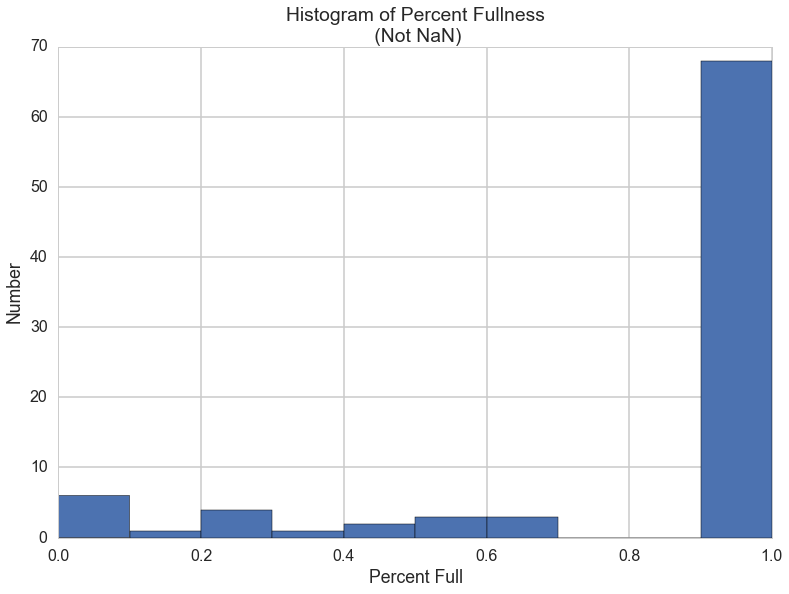

In [486]:
x,y = zip(*fullness)
plt.hist(y);
plt.title('Histogram of Percent Fullness \n (Not NaN)')
plt.xlabel('Percent Full')
plt.ylabel('Number');

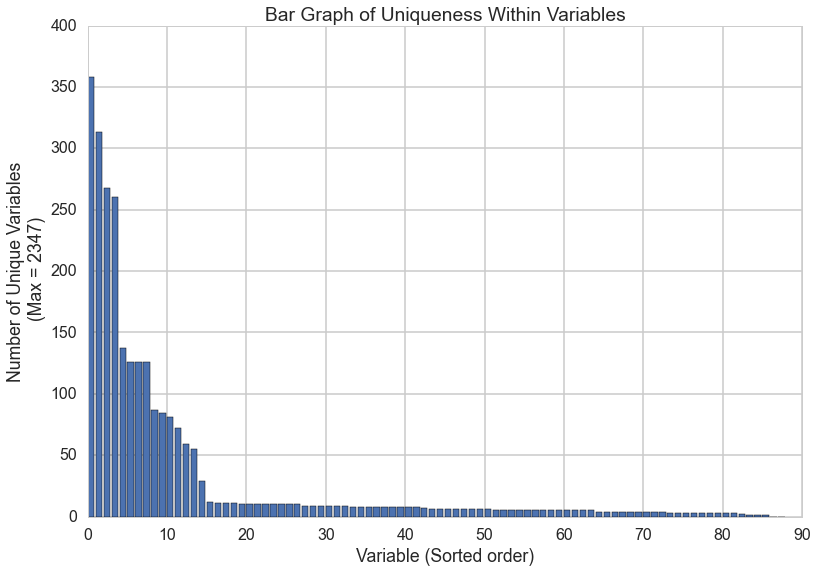

In [487]:
x,y = zip(*uniqueness)
plt.bar(xrange(0,len(x)),y)
plt.title('Bar Graph of Uniqueness Within Variables')
plt.xlabel('Variable (Sorted order)')
plt.ylabel('Number of Unique Variables \n (Max = 2347)');

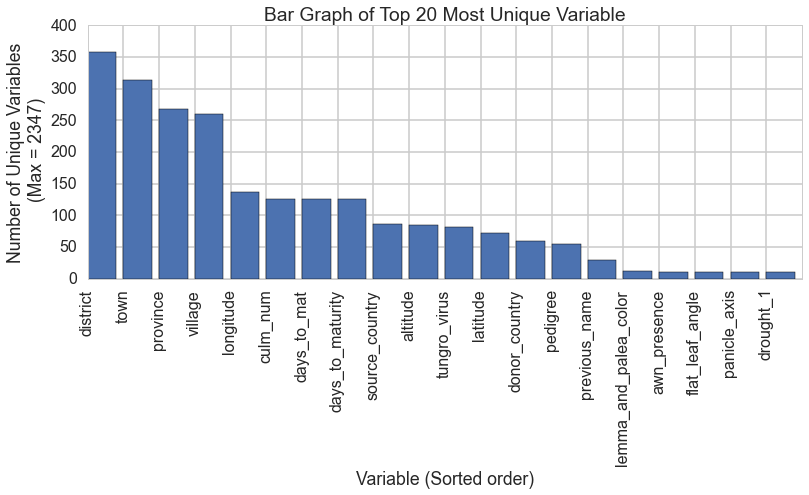

In [488]:
plt.bar(xrange(0,20),y[:20])
plt.xticks(xrange(0,20),(x[:20]),rotation='vertical',);
plt.subplots_adjust(bottom=0.5)
plt.title('Bar Graph of Top 20 Most Unique Variable')
plt.xlabel('Variable (Sorted order)')
plt.ylabel('Number of Unique Variables \n (Max = 2347)');

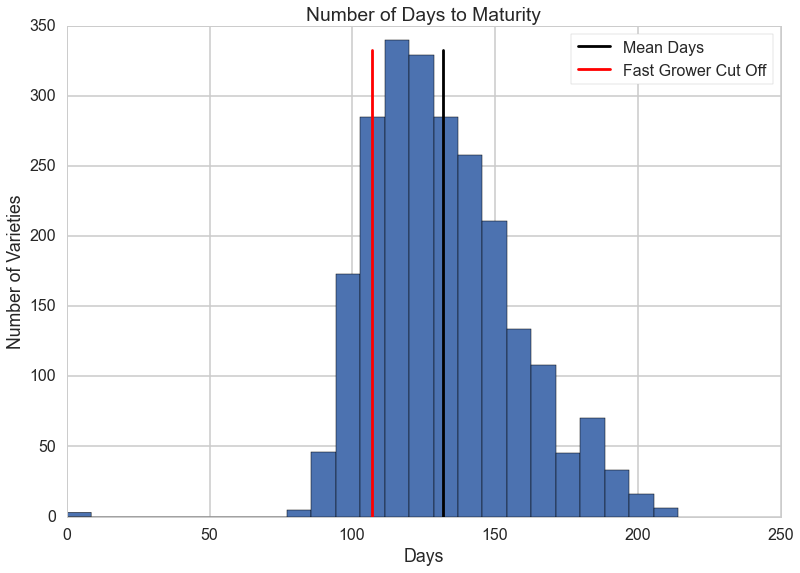

In [489]:
plt.hist(eda_df['days_to_mat'], bins=25);
plt.title('Number of Days to Maturity')
plt.xlabel('Days')
plt.ylabel('Number of Varieties');
plt.axvline(np.mean(eda_df['days_to_mat']), label='Mean Days', color='black',ymax=.95)
plt.axvline(np.mean(eda_df['days_to_mat'])-np.std(eda_df['days_to_mat']), 
            label='Fast Grower Cut Off',color='red',ymax=.95)
plt.legend(frameon=True);


## Feature Based Prediction of Days to Maturity

### Absolute Baseline

In [ ]:
metricsdf = pd.read_csv('data/merged_dataframe_updated.csv')

mat_df=metricsdf[['DNA_UNIQUE_ID','Variety Group (Tree)1',
                  'days_to_mat','source_country','rice_blast']]
print mat_df.shape
mat_df.head()

In [ ]:
mat_df = mat_df[mat_df['days_to_mat'] != 0]

days_list = np.array(mat_df['days_to_mat'])

print "count: " + str(len(days_list))
print "min: " + str(days_list.min())
print "max: " + str(days_list.max())
print "mean: " + str(days_list.mean())
print "std: " + str(days_list.std())

In [ ]:
from sklearn.cross_validation import train_test_split

itrain, itest = train_test_split(xrange(mat_df.shape[0]), train_size=0.7)
mask=np.ones(mat_df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask.shape, mask.sum()

In [ ]:
from sklearn.preprocessing import StandardScaler

mat_df[['days_to_mat']] = mat_df[['days_to_mat']].astype(float)

std_scale = StandardScaler().fit(mat_df[mask]['days_to_mat'])
mat_df['stdardized_mat'] = std_scale.transform(mat_df['days_to_mat'])

# We re-define days_list to only define fast-growers based on the training data
days_list = np.array(mat_df[mask]['days_to_mat'])

fast_grow = [mat_df['days_to_mat'] < (days_list.mean() - days_list.std())]
mat_df['fast'] = fast_grow[0]

mat_df.to_csv('data/mat_df.csv')

print "Fast Grow Cut Off: " + str((days_list.mean() - days_list.std())) + " Days"
mat_df.head(10)

In [ ]:
plt.hist(mat_df['stdardized_mat'], bins=23);
plt.title('Standardized Number of Days to Maturity')
plt.xlabel('Days')
plt.ylabel('Number of Varieties');
plt.axvline(np.mean(mat_df['stdardized_mat']), label='Mean Days', color='black',ymax=.95)
plt.axvline(np.mean(mat_df['stdardized_mat'])-np.std(mat_df['stdardized_mat']), 
            label='Fast Grower Cut Off',color='red',ymax=.95)
plt.legend(frameon=True);

In [ ]:
print "% fast: " + str(sum(mat_df['fast'])/float(len((mat_df['fast']))) * 100)
print "% slow: " + str((1. -sum(mat_df['fast'])/float(len((mat_df['fast'])))) * 100)

This means that we can achieve approximately **84.89% accuracy** if we *always* predict the rice to be a slow grower

### Strain Baseline

In [ ]:
variety_days = {}

for idx, row in enumerate(mat_df[mask].index):
    variety = mat_df[mask].iloc[idx]['Variety Group (Tree)1']
    days = mat_df[mask].iloc[idx]['days_to_mat']
    if variety not in variety_days.keys():
        variety_days.update({variety:[days]})
    else:
        variety_days.get(variety).append(days)
for key in variety_days.keys():
    days = np.mean(variety_days.get(key))
    variety_days.update({key:days})
    
variety_days

In [ ]:
plt.bar(xrange(0,len(variety_days.values())),variety_days.values());
plt.title('Average Days to Maturity by Variety');
plt.ylabel('Days');
plt.xlabel('Variety Type');
plt.axis([0,7,0,150])
plt.xticks(xrange(0,len(variety_days.values())),(variety_days.keys()),rotation='45',);

In [ ]:
from sklearn.metrics import confusion_matrix

a = []
b = []
for row in enumerate(mat_df[~mask].index):
    variety = mat_df[~mask].iloc[row[0]]['Variety Group (Tree)1']
    pred = (0.5*days_list.mean() + 0.5*variety_days.get(variety))
    if pred < (days_list.mean() - days_list.std()):
        a.append(True)
    else:
        a.append(False)
    b.append(pred)
        
conf = confusion_matrix(mat_df[~mask]['fast'], a)
        
print conf
print "Accuracy: " + str(float(conf[0][0]+conf[1][1])/float(len(mat_df[~mask]))*100) + "%"

In [ ]:
cutoff = (days_list.mean() - days_list.std())
plt.scatter(mat_df[~mask]['days_to_mat'],b);
plt.title('Predicted vs. Actual Days to Maturity\n(Variety-Mean Model)');
plt.xlabel('Actual Days');
plt.ylabel('Predicted Days');
plt.plot([80,220],[80,220],'k--', alpha=0.5, label='45 degree line');
plt.axis([80,220,80,220]);
plt.axhline(cutoff, color='black',label='Cut Off Value');
plt.axvline(cutoff, color='r',label='Actual Fast Growers');
plt.legend(frameon=True);

### Strain-Country Baseline Regression

In [ ]:
source_days = {}

for idx, row in enumerate(mat_df[mask].index):
    source = mat_df[mask].iloc[idx]['source_country']
    days = mat_df[mask].iloc[idx]['days_to_mat']
    if source not in source_days.keys():
        source_days.update({source:[days]})
    else:
        source_days.get(source).append(days)
for key in source_days.keys():
    days = np.mean(source_days.get(key))
    num = len(source_days.get(key))
    source_days.update({key:(days,num)})
    
print "Country: " + str(source_days.keys()[2])
print "Avg. Days: " + str(source_days.get(source_days.keys()[2])[0])
print "Strains from Country: " + str(source_days.get(source_days.keys()[2])[1])

In [ ]:
a = (np.sort([source_days.get(source)[1] for source in source_days]))
plt.bar(xrange(0,len(a)),a);
plt.title('Number of Strain by Source Country');
plt.ylabel('Number of Strains');
plt.xlabel('Source Country');
plt.xticks([]);

In [ ]:
a = np.sort([source_days.get(source)[0] for source in source_days])
plt.bar(xrange(0,len(a)),a);
plt.title('Average Days to Maturity by Country');
plt.ylabel('Days');
plt.xlabel('Source Country');
plt.xticks([]);

In [ ]:
a = []
b = []
print (days_list.mean() - days_list.std())
for row in enumerate(mat_df[~mask].index):
    variety = mat_df[~mask].iloc[row[0]]['Variety Group (Tree)1']
    source = mat_df[~mask].iloc[row[0]]['source_country']
    if source in source_days.keys():
        pred = (source_days.get(source)[0])
    else:
        pred = (days_list.mean()+variety_days.get(variety))/2
        
    if pred < (days_list.mean() - days_list.std()):
        a.append(True)
    else:
        a.append(False)
    b.append(pred)
conf = confusion_matrix(mat_df[~mask]['fast'], a)
    
print conf
print "Accuracy: " + str(float(conf[0][0]+conf[1][1])/float(len(mat_df[~mask]))*100) + "%"

In [ ]:
plt.scatter(mat_df[~mask]['days_to_mat'],b);
plt.title('Predicted vs. Actual Days to Maturity\n(Source OR Variety-Mean Model)');
plt.xlabel('Actual Days');
plt.ylabel('Predicted Days');
plt.plot([80,220],[80,220],'k--', alpha=0.5, label='45 degree line');
plt.axis([80,220,80,220]);
plt.axhline(cutoff, color='black',label='Cut Off Value');
plt.axvline(cutoff, color='r',label='Actual Fast Growers');
plt.legend(frameon=True);

In [ ]:
train_df = mat_df[mask]

train_var_days = []
train_source_days = []
for row,_ in enumerate(train_df.index):
    var = train_df.iloc[row]['Variety Group (Tree)1']
    source = train_df.iloc[row]['source_country']
    if source in source_days.keys():
        train_source_days.append((source_days.get(source)[0]))
    else:
        train_source_days.append(days_list.mean())
    train_var_days.append((variety_days.get(var)))
    
train_df.loc[:,'source_val'] = train_source_days
train_df.loc[:,'var_val'] = train_var_days
train_df.loc[:,'mean'] = days_list.mean()

train_df.head(10)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

ols_model = ols('days_to_mat ~ source_val + var_val + mean', train_df).fit()
ols_model.params

In [ ]:
a = []
b = []
mean = days_list.mean()

for row in enumerate(mat_df[~mask].index):
    variety = mat_df[~mask].iloc[row[0]]['Variety Group (Tree)1']
    source = mat_df[~mask].iloc[row[0]]['source_country']
    
    if source in source_days.keys():
        pred = (ols_model.params.Intercept + ols_model.params.source_val*source_days.get(source)[0]
        + ols_model.params.var_val*variety_days.get(variety) + ols_model.params['mean']*mean)
   
    else:
        pred = (ols_model.params.Intercept + ols_model.params.source_val*mean
        + ols_model.params.var_val*variety_days.get(variety) + ols_model.params['mean']*mean)

    if pred < (days_list.mean() - days_list.std()):
        a.append(True)
    else:
        a.append(False)
    b.append(pred)
conf = confusion_matrix(mat_df[~mask]['fast'], a)
    
print conf
print "Accuracy: " + str(float(conf[0][0]+conf[1][1])/float(len(mat_df[~mask]))*100) + "%"

In [ ]:
plt.scatter(mat_df[~mask]['days_to_mat'],b);
plt.title('Predicted vs. Actual Days to Maturity\n(Source-Variety-Mean Regression Model)');
plt.xlabel('Actual Days');
plt.ylabel('Predicted Days');
plt.plot([80,220],[80,220],'k--', alpha=0.5, label='45 degree line');
plt.axis([80,220,80,220]);
plt.axhline(cutoff, color='black',label='Cut Off Value');
plt.axvline(cutoff, color='r',label='Actual Fast Growers');
plt.legend(frameon=True);

### Normalized Strain-Country Baseline Regression

In [ ]:
stddays_list = [item for item in mat_df[mask]['stdardized_mat']]
stdmean = np.mean(stddays_list)

stdvariety_days = {}

for idx, row in enumerate(mat_df[mask].index):
    variety = mat_df[mask].iloc[idx]['Variety Group (Tree)1']
    days = mat_df[mask].iloc[idx]['stdardized_mat']
    if variety not in stdvariety_days.keys():
        stdvariety_days.update({variety:[days]})
    else:
        stdvariety_days.get(variety).append(days)
for key in stdvariety_days.keys():
    days = np.mean(stdvariety_days.get(key))
    stdvariety_days.update({key:days})
    
stdsource_days = {}

for idx, row in enumerate(mat_df[mask].index):
    source = mat_df[mask].iloc[idx]['source_country']
    days = mat_df[mask].iloc[idx]['stdardized_mat']
    if source not in stdsource_days.keys():
        stdsource_days.update({source:[days]})
    else:
        stdsource_days.get(source).append(days)
for key in stdsource_days.keys():
    days = np.mean(stdsource_days.get(key))
    num = len(stdsource_days.get(key))
    stdsource_days.update({key:(days,num)})
    
stdtrain_var_days = []
stdtrain_source_days = []
for row,_ in enumerate(train_df.index):
    var = train_df.iloc[row]['Variety Group (Tree)1']
    source = train_df.iloc[row]['source_country']
    if source in stdsource_days.keys():
        stdtrain_source_days.append((stdsource_days.get(source)[0]))
    else:
        stdtrain_source_days.append(0)
    stdtrain_var_days.append((stdvariety_days.get(var)))
    
train_df.loc[:,'stdsource_val'] = (stdtrain_source_days)
train_df.loc[:,'stdvar_val'] = (stdtrain_var_days)
train_df.loc[:,'mean'] = days_list.mean()
train_df.loc[:,'std_mean'] = 0

In [ ]:
a = np.sort([stdsource_days.get(source)[0] for source in stdsource_days])
plt.bar(xrange(0,len(a)),a, alpha=.75);
plt.title('Standardized Days to Maturity by Country');
plt.ylabel('Value');
plt.xlabel('Source Country');
plt.xticks([]);

In [ ]:
stdols_model = ols('stdardized_mat ~ stdsource_val + stdvar_val + std_mean', train_df).fit()
stdols_model.params

In [ ]:
a = []
b=[]

for row in enumerate(mat_df[~mask].index):
    variety = mat_df[~mask].iloc[row[0]]['Variety Group (Tree)1']
    source = mat_df[~mask].iloc[row[0]]['source_country']
    
    if source in stdsource_days.keys():
        pred = (stdols_model.params.Intercept + stdols_model.params.stdsource_val*stdsource_days.get(source)[0]
        + stdols_model.params.stdvar_val*stdvariety_days.get(variety))
   
    else:
        pred = (stdols_model.params.Intercept + stdols_model.params.stdvar_val*stdvariety_days.get(variety))

    if pred < (0 - np.std(stddays_list)):
        a.append(True)
    else:
        a.append(False)
    b.append(pred)
conf = confusion_matrix(mat_df[~mask]['fast'], a)
    
print conf
print "Accuracy: " + str(float(conf[0][0]+conf[1][1])/float(len(mat_df[~mask]))*100) + "%"

In [ ]:
plt.scatter(mat_df[~mask]['stdardized_mat'],b);
plt.title('Predicted vs. Actual Days to Maturity\n(Standardized Source-Variety-Mean Regression Model)');
plt.xlabel('Actual Days');
plt.ylabel('Predicted Days');
plt.plot([-3,3],[-3,3],'k--', alpha=0.5, label='45 degree line');
plt.axis([-3,3,-3,3]);
plt.axhline(-1, color='black',label='Cut Off Value');
plt.axvline(-1, color='r',label='Actual Fast Growers');
plt.legend(frameon=True);

## Accessing SNP Data

<img src="https://www.broadinstitute.org/files/news/stories/full/SNP_260x260.jpg" width=200 height=300/>
Image from: https://www.broadinstitute.org/files/news/stories/full/SNP_260x260.jpg

### Accessing Process

The SNP data was downwloaded as PED and MAP files from https://s3.amazonaws.com/3kricegenome/reduced/NB-core_v4.ped.gz and https://s3.amazonaws.com/3kricegenome/reduced/NB-core_v4.map.gz. These files were then converted to a VCF file using plink 1.9 (can be downloaded at https://www.cog-genomics.org/plink2) with the terminal command `command: ./plink --file tempdata/NB-core_v4 --recode vcf`. This was done to make the data in a format compatible with the PyVCF package. The VCF file was over 12 GB, so we could not include it in the repository.

### Database Construction

TEXT

In [ ]:
vcf_reader=vcf.Reader(open('tempdata/plink.vcf', 'r'))

In [ ]:
#create counter
i = 0
#create dataframe to hold snp data with samples as columns
snpdf=pd.DataFrame(columns=vcf_reader.samples)
#create default dict list to hold snps
snps = defaultdict(list)
#create array to hold index values
ind_array=[]
#iterate through every snp
for snp in vcf_reader:
    #create a location string containing chromosome and position
    loc=(str(snp.CHROM)+'_'+str(snp.POS))
    #add loc string to ind_array
    ind_array.append(loc)
    #increase counter
    i = i+1
    #go through every sample for snp
    for sample in (snp.samples):
        #add sample name as key and genotype as value to snps dict
        snps[sample.sample].append(sample.data.GT)
    if (i % 1000) == 0:
        #create dataframe from snps dict
        df=pd.DataFrame.from_dict(snps)
        #set index column of dataframe to be ind_array
        df['index']=ind_array
        #set index to index column
        df=df.set_index('index')
        #remove name of index
        df.index.name = None
        #add dataframe to full snp dataframe
        snpdf=snpdf.append(df)
        #reset snps dict
        snps={}
        snps = defaultdict(list)
        #reset ind_array
        ind_array=[]
    if (i%50000)==0:
        #create csv of 50,000 snps
        name=('tempdata/snps'+str(i/50000)+'.csv')
        snpdf.to_csv(name)
        #reset dataframe
        snpdf=pd.DataFrame(columns=vcf_reader.samples)
        print 'created' + str(name)
#save final snp data to csv
snpdf.to_csv('tempdata/snps20.csv')

`CPU times: user 6h 56min 47s, sys: 11min 6s, total: 7h 7min 53s, Wall time: 7h 9min 33s`

These 20 CSV files created from the VCF file abover were each over 500 MB in size, so we were unable to include them in our repository. However, they can be downloaded within a compressed file from this Dropbox link: https://www.dropbox.com/sh/orgk51k8pgka69p/AABRBRvb9gDQgRtcuKKLYVnZa?dl=0.

TEXT

### EDA of SNP Data

In [ ]:
snpedadf= pd.read_csv('tempdata/snps1.csv', index_col=0)
print snpedadf.shape
snpedadf.head()

In [ ]:
snpedadf = snpedadf.replace(['0/0', '0/1', '1/1', np.nan], [0, 1, 2, 3])
snpedadf.head()

In [ ]:
index_uniques = []
for row in snpedadf.iterrows():
    index_uniques.append(np.bincount(row[1].values))
index_uniques[:3]

In [ ]:
pltter=[]
for index in index_uniques:
    if len(index) == 4:
          pltter.append(index)
            
a = [float(arr[0]) for arr in pltter]
b = [float(arr[1]) for arr in pltter]
c = [float(arr[2]) for arr in pltter]
d = [float(arr[3]) for arr in pltter]
count = float((len(snpedadf.columns)*len(snpedadf.index)))

pcents = [(np.sum(a)/count),(np.sum(b)/count),(np.sum(c)/count),(np.sum(d)/count)]
plt.bar(xrange(0,4),pcents);
plt.title('% of SNPs of Types');
plt.ylabel('Percent');
plt.xticks([.4,1.4,2.4,3.4],['Homozygous\nReference','Heterozygous','Homozygous\nMutant','NaN'],rotation='0',);
print "NaN: " + str((np.sum(d)/count)*100) + " %"

In [ ]:
a = [float(arr[0])/float(len(snpedadf.columns)) for arr in pltter]
b = [float(arr[1])/float(len(snpedadf.columns)) for arr in pltter]
c = [float(arr[2])/float(len(snpedadf.columns)) for arr in pltter]
d = [float(arr[3])/float(len(snpedadf.columns)) for arr in pltter]

f, axarr = plt.subplots(2, 2)

axarr[0, 0].hist(a,alpha=1);
axarr[0, 0].set_title('Homozygous, Reference',fontsize=14);
axarr[0, 0].set_xlim([0, 1])
axarr[0, 0].set_ylim([0, 40000])

axarr[0, 1].hist(b,alpha=1);
axarr[0, 1].set_title('Heterozygous',fontsize=14);
axarr[0, 1].set_xlim([0, 1])
axarr[0, 1].set_ylim([0, 40000])

axarr[1, 0].hist(c,alpha=1,);
axarr[1, 0].set_title('Homozygous, Mutant',fontsize=14);
axarr[1, 0].set_xlim([0, 1])
axarr[1, 0].set_ylim([0, 40000])

axarr[1, 1].hist(d,alpha=1);
axarr[1, 1].set_title('NaN',fontsize=14);
axarr[1, 1].set_xlim([0, 1])
axarr[1, 1].set_ylim([0, 40000])

f.suptitle('Percent of SNP Type \n by Individual SNP',fontsize=20);
plt.legend(frameon=True);

# HERE IS WHERE WE DECIDE TO MAP ALL NAN's TO THE REFERENCE

In [ ]:
snp_edadf= pd.read_csv('tempdata/finally1.csv', index_col=0)
print snp_edadf.shape
snp_edadf.head()

In [ ]:
from scipy.stats import spearmanr

snp_cols = list(snp_edadf.columns[1:])

spearman_cor_dict = {}
p_val_dict = {}
neg_log_p_val_dict = {}
for snp in snp_cols:
    cor,p = spearmanr(list(snp_edadf['fast']),list(snp_edadf[snp]))
    spearman_cor_dict.update({snp:(cor)}) 
    p_val_dict.update({snp:(p)})
    pp = -np.log10(p)
    neg_log_p_val_dict.update({snp:(pp)})

In [ ]:
stats_df=pd.DataFrame(spearman_cor_dict, index=['spearman_cor']).append(pd.DataFrame(p_val_dict, index=['p_vals'])).append(pd.DataFrame(neg_log_p_val_dict, index=['neg_log_p_vals']))
stats_df=stats_df.transpose()

new_names = []
for name in stats_df.index.values:
    i=0
    for c in name:
        i+=1
        if c=='_':
            upd_name=int(name[i:])
            break
    new_names.append(upd_name)

stats_df.loc[:,'name']=(new_names)
stats_df.set_index('name',inplace=True)
stats_df.head()

In [ ]:
plt.scatter(stats_df.index.values,stats_df['neg_log_p_vals'],alpha=.15)
plt.axis([0,np.max(stats_df.index.values),0,60]);
plt.title('Manhattan Plot of First 50k SNPs\n(Correlation to Fast Growth)');
plt.ylabel('-log10 (p-value)')
plt.xlabel('SNP Location');

In [ ]:
plt.scatter(stats_df.index.values,stats_df['spearman_cor'],alpha=.15);
plt.axis([0,np.max(stats_df.index.values),-.4,.4]);
plt.title('Spearman Rho Values \n(Correlation to Fast Growth)');
plt.ylabel('Rho Value')
plt.xlabel('SNP Location');

## Predicting Days to Maturity with SNP Data

In [ ]:
dfs=['../SNP_Data/snps1.csv','../SNP_Data/snps2.csv','../SNP_Data/snps3.csv',
     '../SNP_Data/snps4.csv','../SNP_Data/snps5.csv','../SNP_Data/snps6.csv',
     '../SNP_Data/snps7.csv','../SNP_Data/snps8.csv','../SNP_Data/snps9.csv',
     '../SNP_Data/snps10.csv','../SNP_Data/snps11.csv','../SNP_Data/snps12.csv',
     '../SNP_Data/snps13.csv','../SNP_Data/snps14.csv','../SNP_Data/snps15.csv',
     '../SNP_Data/snps16.csv','../SNP_Data/snps17.csv','../SNP_Data/snps18.csv',
     '../SNP_Data/snps19.csv','../SNP_Data/snps20.csv',]

In [ ]:
def make_useable(dfs,merged_df):
    counter=0
    for df_name in dfs:
        counter+=1
        snpdf=pd.read_csv(df_name, index_col=0)
        
        snpdf=snpdf.transpose()
        
        select  = list(snpdf.index)
        ARRAY=[]
        for name in select:
            if name[:4]=='IRIS':
                und=0
                i=0
                for c in name:
                    if c=='_':
                        und+=1
                    if und==2:
                        upd_name=name[:i]
                        upd_name=upd_name.replace('_', ' ')
                        if upd_name in list(metricsdf.DNA_UNIQUE_ID):
                            ARRAY.append(upd_name)
                        else:
                            ARRAY.append(name)
                        break
                    i+=1
            else:
                ARRAY.append(name)
                
        snpdf['index']=ARRAY
        
        snpdf.set_index('index', inplace=True)
        
        snpdf.index.name = None
        
        snpdf=snpdf.transpose()
        
        snpdf = snpdf.replace(['0/0', '0/1', '1/1', np.nan], [0, 1, 2, 0])
        
        snpdf=snpdf.transpose()
        
        merged_df=pd.merge(left=metricsdf,right=snpdf, left_on='DNA_UNIQUE_ID', right_index=True)
        
        merged_df.set_index('DNA_UNIQUE_ID', inplace=True)
        
        merged_df.drop(['Variety Group (Tree)1', 'source_country', 'rice_blast', 'days_to_mat','stdardized_mat','z_score'], axis=1,inplace=True)
        
        merged_df[['fast']] = merged_df[['fast']].astype(int)
        
        print ('making csv'+str(counter))
        
        merged_df.to_csv('../finally'+str(counter)+'.csv')

In [ ]:
make_useable(dfs,mat_df)

In [ ]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
#your code here
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    #create gridsearch
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    #fit gridsearch to inputed values
    gs.fit(X, y)
    #determine best estimator and return it
    best = gs.best_estimator_
    return best

from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.4f" % (training_accuracy)
    print "Accuracy on test data:     %0.4f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals 

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats.stats import pearsonr
from sklearn.svm import LinearSVC
import operator
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [ ]:
def do_analysis(df_names):
    counter=0
    for df_name in df_names:
        counter+=1
        
        print ('snps '+str(counter))
        
        merged_df=pd.read_csv(df_name, index_col=0)
        
        lcols=list(merged_df)
        lcols.remove('fast')
        
        itrain, itest = train_test_split(xrange(merged_df.shape[0]), train_size=0.7)
        mask=np.ones(merged_df.shape[0], dtype='int')
        mask[itrain]=1
        mask[itest]=0
        mask = (mask==1)
        mask.shape, mask.sum()
        
        clflog, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
        
        clfsvm_final, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
        
        reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)
        
        clfsvm=LinearSVC(loss="hinge")
        Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
        Xmatrix=merged_df[lcols].values
        Yresp=merged_df['fast'].values

        Xmatrix_train=Xmatrix[mask]
        Xmatrix_test=Xmatrix[~mask]
        Yresp_train=Yresp[mask]
        Yresp_test=Yresp[~mask]

        #set parameters
        parameters = {"C": Cs}
        #create fitmodel with classifier
        fitmodel = GridSearchCV(clfsvm, param_grid=parameters, cv=5, scoring="accuracy")
        #fit model with training data
        fitmodel.fit(Xmatrix_train, Yresp_train)
        #output best values
        print fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_
        
        selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
        pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])
        
        pipelinearsvm, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, reuse_split=reuse_split)

In [3]:
upd_dfs=['../finally1.csv','../finally2.csv','../finally3.csv',
     '../finally4.csv','../finally5.csv','../finally6.csv',
     '../finally7.csv','../finally8.csv','../finally9.csv',
     '../finally10.csv','../finally11.csv','../finally12.csv',
     '../finally13.csv','../finally14.csv','../finally15.csv',
     '../finally16.csv','../finally17.csv','../finally18.csv',
     '../finally19.csv','../finally20.csv',]

In [ ]:
do_analysis(upd_dfs)

    snps 1
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.86
    [[602   0]
     [101   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.90
    [[577  25]
     [ 47  54]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.799390243902 [mean: 0.79939, std: 0.05104, params: {'C': 0.001}, mean: 0.79817, std: 0.04958, params: {'C': 0.01}, mean: 0.79817, std: 0.04958, params: {'C': 0.1}, mean: 0.79817, std: 0.04958, params: {'C': 1.0}, mean: 0.79817, std: 0.04958, params: {'C': 10.0}, mean: 0.79817, std: 0.04958, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.83
    Accuracy on test data:     0.85
    [[548  54]
     [ 49  52]]
    ########################################################
    
    snps 2
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[595   0]
     [108   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[560  35]
     [ 64  44]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.796341463415 [mean: 0.79573, std: 0.05726, params: {'C': 0.001}, mean: 0.79634, std: 0.05800, params: {'C': 0.01}, mean: 0.79634, std: 0.05800, params: {'C': 0.1}, mean: 0.79634, std: 0.05800, params: {'C': 1.0}, mean: 0.79634, std: 0.05800, params: {'C': 10.0}, mean: 0.79634, std: 0.05800, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[595   0]
     [108   0]]
    ########################################################
    
    snps 3
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[592   0]
     [111   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[557  35]
     [ 62  49]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.806097560976 [mean: 0.80610, std: 0.06609, params: {'C': 0.001}, mean: 0.80488, std: 0.06607, params: {'C': 0.01}, mean: 0.80488, std: 0.06607, params: {'C': 0.1}, mean: 0.80488, std: 0.06607, params: {'C': 1.0}, mean: 0.80488, std: 0.06607, params: {'C': 10.0}, mean: 0.80488, std: 0.06607, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[592   0]
     [111   0]]
    ########################################################
    
    snps 4
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[597   0]
     [106   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[557  40]
     [ 58  48]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.818292682927 [mean: 0.81585, std: 0.05092, params: {'C': 0.001}, mean: 0.81829, std: 0.05347, params: {'C': 0.01}, mean: 0.81829, std: 0.05347, params: {'C': 0.1}, mean: 0.81829, std: 0.05347, params: {'C': 1.0}, mean: 0.81829, std: 0.05347, params: {'C': 10.0}, mean: 0.81829, std: 0.05347, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[597   0]
     [106   0]]
    ########################################################
    
    snps 5
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.86
    Accuracy on test data:     0.83
    [[585   0]
     [118   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.85
    [[552  33]
     [ 73  45]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.82256097561 [mean: 0.82256, std: 0.05687, params: {'C': 0.001}, mean: 0.81463, std: 0.05583, params: {'C': 0.01}, mean: 0.81463, std: 0.05583, params: {'C': 0.1}, mean: 0.81463, std: 0.05583, params: {'C': 1.0}, mean: 0.81463, std: 0.05583, params: {'C': 10.0}, mean: 0.81463, std: 0.05583, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.88
    Accuracy on test data:     0.83
    [[566  19]
     [ 98  20]]
    ########################################################
    
    snps 6
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[598   0]
     [105   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.87
    [[573  25]
     [ 68  37]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.782317073171 [mean: 0.78232, std: 0.06552, params: {'C': 0.001}, mean: 0.78110, std: 0.06824, params: {'C': 0.01}, mean: 0.78110, std: 0.06824, params: {'C': 0.1}, mean: 0.78110, std: 0.06824, params: {'C': 1.0}, mean: 0.78110, std: 0.06824, params: {'C': 10.0}, mean: 0.78110, std: 0.06824, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[598   0]
     [105   0]]
    ########################################################
    
    snps 7
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[590   0]
     [113   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[559  31]
     [ 65  48]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.816463414634 [mean: 0.81585, std: 0.04601, params: {'C': 0.001}, mean: 0.81646, std: 0.04828, params: {'C': 0.01}, mean: 0.81646, std: 0.04828, params: {'C': 0.1}, mean: 0.81646, std: 0.04828, params: {'C': 1.0}, mean: 0.81646, std: 0.04828, params: {'C': 10.0}, mean: 0.81646, std: 0.04828, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[590   0]
     [113   0]]
    ########################################################
    
    snps 8
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[610   0]
     [ 93   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.87
    [[580  30]
     [ 61  32]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.796341463415 [mean: 0.79634, std: 0.05843, params: {'C': 0.001}, mean: 0.79390, std: 0.05730, params: {'C': 0.01}, mean: 0.79390, std: 0.05730, params: {'C': 0.1}, mean: 0.79390, std: 0.05730, params: {'C': 1.0}, mean: 0.79390, std: 0.05730, params: {'C': 10.0}, mean: 0.79390, std: 0.05730, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[610   0]
     [ 93   0]]
    ########################################################
    
    snps 9
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.86
    [[602   0]
     [101   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.89
    [[571  31]
     [ 48  53]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.795731707317 [mean: 0.79207, std: 0.05024, params: {'C': 0.001}, mean: 0.79573, std: 0.05006, params: {'C': 0.01}, mean: 0.79573, std: 0.05006, params: {'C': 0.1}, mean: 0.79573, std: 0.05006, params: {'C': 1.0}, mean: 0.79573, std: 0.05006, params: {'C': 10.0}, mean: 0.79573, std: 0.05006, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.86
    [[602   0]
     [101   0]]
    ########################################################
    
    snps 10
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.88
    [[569  31]
     [ 56  47]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.790853658537 [mean: 0.79085, std: 0.05225, params: {'C': 0.001}, mean: 0.79024, std: 0.05004, params: {'C': 0.01}, mean: 0.79024, std: 0.05004, params: {'C': 0.1}, mean: 0.79024, std: 0.05004, params: {'C': 1.0}, mean: 0.79024, std: 0.05004, params: {'C': 10.0}, mean: 0.79024, std: 0.05004, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    
    snps 11
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.87
    [[572  28]
     [ 61  42]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.798780487805 [mean: 0.79451, std: 0.06507, params: {'C': 0.001}, mean: 0.79878, std: 0.06653, params: {'C': 0.01}, mean: 0.79878, std: 0.06653, params: {'C': 0.1}, mean: 0.79878, std: 0.06653, params: {'C': 1.0}, mean: 0.79878, std: 0.06653, params: {'C': 10.0}, mean: 0.79878, std: 0.06653, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    
    snps 12
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[555  45]
     [ 53  50]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.810365853659 [mean: 0.80976, std: 0.05545, params: {'C': 0.001}, mean: 0.81037, std: 0.05662, params: {'C': 0.01}, mean: 0.81037, std: 0.05662, params: {'C': 0.1}, mean: 0.81037, std: 0.05662, params: {'C': 1.0}, mean: 0.81037, std: 0.05662, params: {'C': 10.0}, mean: 0.81037, std: 0.05662, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[600   0]
     [103   0]]
    ########################################################
    
    snps 13
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[596   0]
     [107   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.87
    [[564  32]
     [ 59  48]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.808536585366 [mean: 0.80854, std: 0.04830, params: {'C': 0.001}, mean: 0.80793, std: 0.05322, params: {'C': 0.01}, mean: 0.80793, std: 0.05322, params: {'C': 0.1}, mean: 0.80793, std: 0.05322, params: {'C': 1.0}, mean: 0.80793, std: 0.05322, params: {'C': 10.0}, mean: 0.80793, std: 0.05322, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[596   0]
     [107   0]]
    ########################################################
    
    snps 14
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.88
    [[616   0]
     [ 87   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.88
    [[585  31]
     [ 54  33]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.776219512195 [mean: 0.77622, std: 0.06963, params: {'C': 0.001}, mean: 0.77073, std: 0.06534, params: {'C': 0.01}, mean: 0.77073, std: 0.06534, params: {'C': 0.1}, mean: 0.77073, std: 0.06534, params: {'C': 1.0}, mean: 0.77073, std: 0.06534, params: {'C': 10.0}, mean: 0.77073, std: 0.06534, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.88
    [[616   0]
     [ 87   0]]
    ########################################################
    
    snps 15
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[599   0]
     [104   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[559  40]
     [ 60  44]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.787804878049 [mean: 0.78780, std: 0.06997, params: {'C': 0.001}, mean: 0.78415, std: 0.06799, params: {'C': 0.01}, mean: 0.78415, std: 0.06799, params: {'C': 0.1}, mean: 0.78415, std: 0.06799, params: {'C': 1.0}, mean: 0.78415, std: 0.06799, params: {'C': 10.0}, mean: 0.78415, std: 0.06799, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[599   0]
     [104   0]]
    ########################################################
    
    snps 16
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[589   0]
     [114   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[556  33]
     [ 67  47]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.821341463415 [mean: 0.81890, std: 0.04598, params: {'C': 0.001}, mean: 0.82134, std: 0.05008, params: {'C': 0.01}, mean: 0.82134, std: 0.05008, params: {'C': 0.1}, mean: 0.82134, std: 0.05008, params: {'C': 1.0}, mean: 0.82134, std: 0.05008, params: {'C': 10.0}, mean: 0.82134, std: 0.05008, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.84
    [[589   0]
     [114   0]]
    ########################################################
    
    snps 17
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[599   0]
     [104   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.89
    [[577  22]
     [ 58  46]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.785365853659 [mean: 0.78537, std: 0.07928, params: {'C': 0.001}, mean: 0.78537, std: 0.08049, params: {'C': 0.01}, mean: 0.78537, std: 0.08049, params: {'C': 0.1}, mean: 0.78537, std: 0.08049, params: {'C': 1.0}, mean: 0.78537, std: 0.08049, params: {'C': 10.0}, mean: 0.78537, std: 0.08049, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[599   0]
     [104   0]]
    ########################################################
    
    snps 18
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[615   0]
     [ 88   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.89
    [[588  27]
     [ 49  39]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.765243902439 [mean: 0.76402, std: 0.05819, params: {'C': 0.001}, mean: 0.76524, std: 0.05911, params: {'C': 0.01}, mean: 0.76524, std: 0.05911, params: {'C': 0.1}, mean: 0.76524, std: 0.05911, params: {'C': 1.0}, mean: 0.76524, std: 0.05911, params: {'C': 10.0}, mean: 0.76524, std: 0.05911, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[615   0]
     [ 88   0]]
    ########################################################
    
    snps 19
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[595   0]
     [108   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.86
    [[557  38]
     [ 62  46]]
    ########################################################
    LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.01} 0.786585365854 [mean: 0.78476, std: 0.07214, params: {'C': 0.001}, mean: 0.78659, std: 0.07204, params: {'C': 0.01}, mean: 0.78659, std: 0.07204, params: {'C': 0.1}, mean: 0.78659, std: 0.07204, params: {'C': 1.0}, mean: 0.78659, std: 0.07204, params: {'C': 10.0}, mean: 0.78659, std: 0.07204, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.85
    Accuracy on test data:     0.85
    [[595   0]
     [108   0]]
    ########################################################
    
    snps 20
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[609   0]
     [ 94   0]]
    ########################################################
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.00
    Accuracy on test data:     0.88
    [[575  34]
     [ 47  47]]
    ########################################################
    LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
         penalty='l2', random_state=None, tol=0.0001, verbose=0) {'C': 0.001} 0.791463414634 [mean: 0.79146, std: 0.05793, params: {'C': 0.001}, mean: 0.79024, std: 0.05853, params: {'C': 0.01}, mean: 0.79024, std: 0.05853, params: {'C': 0.1}, mean: 0.79024, std: 0.05853, params: {'C': 1.0}, mean: 0.79024, std: 0.05853, params: {'C': 10.0}, mean: 0.79024, std: 0.05853, params: {'C': 100.0}]
    using reuse split
    ############# based on standard predict ################
    Accuracy on training data: 0.84
    Accuracy on test data:     0.87
    [[609   0]
     [ 94   0]]
    ########################################################

In [ ]:
def get_coeficcients(df_names):
    counter=0
    coef_dict={}
    for df_name in df_names:
        counter+=1
        
        print ('snps '+str(counter))
        
        merged_df=pd.read_csv(df_name, index_col=0)
        
        lcols=list(merged_df)
        lcols.remove('fast')
        
        itrain, itest = train_test_split(xrange(merged_df.shape[0]), train_size=0.7)
        mask=np.ones(merged_df.shape[0], dtype='int')
        mask[itrain]=1
        mask[itest]=0
        mask = (mask==1)
        mask.shape, mask.sum()
        
        clfsvm_final, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, merged_df,lcols, 'fast',1, mask=mask)
        coefs=dict(zip(merged_df.columns.values[1:],clfsvm_final.coef_[0]))
        coef_dict.update(coefs)
    return coef_dict

In [ ]:
coefs=get_coeficcients(upd_dfs)

    snps 1
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8578
    [[561  39]
     [ 61  42]]
    ########################################################
    snps 2
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8777
    [[577  35]
     [ 51  40]]
    ########################################################
    snps 3
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8791
    [[575  28]
     [ 57  43]]
    ########################################################
    snps 4
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8791
    [[573  43]
     [ 42  45]]
    ########################################################
    snps 5
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8535
    [[556  32]
     [ 71  44]]
    ########################################################
    snps 6
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9988
    Accuracy on test data:     0.8634
    [[551  30]
     [ 66  56]]
    ########################################################
    snps 7
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8691
    [[563  37]
     [ 55  48]]
    ########################################################
    snps 8
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9976
    Accuracy on test data:     0.8734
    [[560  27]
     [ 62  54]]
    ########################################################
    snps 9
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9994
    Accuracy on test data:     0.8848
    [[580  27]
     [ 54  42]]
    ########################################################
    snps 10
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9976
    Accuracy on test data:     0.8606
    [[560  38]
     [ 60  45]]
    ########################################################
    snps 11
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8791
    [[562  25]
     [ 60  56]]
    ########################################################
    snps 12
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9994
    Accuracy on test data:     0.8663
    [[550  41]
     [ 53  59]]
    ########################################################
    snps 13
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9988
    Accuracy on test data:     0.8720
    [[572  32]
     [ 58  41]]
    ########################################################
    snps 14
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8890
    [[575  29]
     [ 49  50]]
    ########################################################
    snps 15
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8578
    [[559  30]
     [ 70  44]]
    ########################################################
    snps 16
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8777
    [[564  29]
     [ 57  53]]
    ########################################################
    snps 17
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8805
    [[563  35]
     [ 49  56]]
    ########################################################
    snps 18
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9988
    Accuracy on test data:     0.8634
    [[555  43]
     [ 53  52]]
    ########################################################
    snps 19
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 1.0000
    Accuracy on test data:     0.8578
    [[563  22]
     [ 78  40]]
    ########################################################
    snps 20
    using mask
    ############# based on standard predict ################
    Accuracy on training data: 0.9994
    Accuracy on test data:     0.8805
    [[568  25]
     [ 59  51]]
    ########################################################

In [ ]:
coefs_df=pd.DataFrame(coefs, index=['coefficient'])

In [ ]:
coefs_df=coefs_df.transpose()

In [ ]:
new_names = []
for name in coefs_df.index.values:
    i=0
    for c in name:
        i+=1
        if c=='_':
            upd_name=int(name[i:])
            break
    new_names.append(upd_name)

coefs_df.loc[:,'name']=(new_names)
coefs_df.set_index('name',inplace=True)
coefs_df.head()

In [ ]:
plt.scatter(coefs_df.index.values,abs(coefs_df['coefficient']),alpha=.1)
plt.axis([0,np.max(coefs_df.index.values),0,.03]);

In [ ]:
coefs_df.to_csv('coefs_df.csv')

In [ ]:
def combine_snps(dfs):
    counter=0

    for df_name in dfs:
        
        merged_df=pd.read_csv(df_name, index_col=0)
        if counter ==0:
            finaldf=pd.DataFrame(index=list(merged_df.index))
            finaldf=finaldf.transpose()                      
        counter+=1
        merged_df=merged_df.transpose()
        if counter != 1:
            merged_df.drop(['fast'], inplace=True)
        frames=[finaldf,merged_df]
        finaldf=pd.concat(frames)
    finaldf=finaldf.transpose()
    return finaldf

In [ ]:
finaldf=combine_snps(upd_dfs)

In [ ]:
finaldf.to_csv('tempdata/finally_totals.csv')

In [ ]:
snp_cols = list(finaldf.columns[1:])

In [ ]:
corrs = []
for i in snp_cols:
    corr = finaldf.loc[:, [i, 'fast']].corr(method="spearman") 
    corrs.append(corr.iloc[0,1])

In [ ]:
plt.plot(np.abs(corrs), '.', markersize=4, linestyle='None');

In [ ]:
from scipy.stats import spearmanr

snp_cols = list(finaldf.columns[1:])

spearman_cor_dict = {}
p_val_dict = {}
neg_log_p_val_dict = {}
for snp in snp_cols:
    cor,p = spearmanr(list(finaldf['fast']),list(finaldf[snp]))
    spearman_cor_dict.update({snp:(cor)}) 
    p_val_dict.update({snp:(p)})
    pp = -np.log10(p)
    neg_log_p_val_dict.update({snp:(pp)})

In [ ]:
stats_df=pd.DataFrame(spearman_cor_dict, index=['spearman_cor']).append(pd.DataFrame(p_val_dict, index=['p_vals'])).append(pd.DataFrame(neg_log_p_val_dict, index=['neg_log_p_vals']))
stats_df=stats_df.transpose()

new_names = []
for name in stats_df.index.values:
    i=0
    for c in name:
        i+=1
        if c=='_':
            upd_name=int(name[i:])
            break=
    new_names.append(upd_name)

stats_df.loc[:,'name']=(new_names)
stats_df.set_index('name',inplace=True)

In [ ]:
plt.scatter(stats_df.index.values,stats_df['neg_log_p_vals'],alpha=.15);

In [ ]:
plt.scatter(stats_df.index.values,stats_df['spearman_cor'],alpha=.1);

In [ ]:
plt.scatter(stats_df.index.values,abs(stats_df['spearman_cor']),alpha=.1)
plt.axis([0,np.max(stats_df.index.values),0,.6]);

In [ ]:
stats_df.to_csv('all_stats_df.csv')